# **Emmanuel NYANDU KAGARABI**

# **Applied Machine Learning at scale : Condensed practicals**

`Initially, all my files were stored in different notebooks. You can view them on my GitHub page at` [emmanuelnyandukagarabi](https://github.com/emmanuelnyandukagarabi/RECOMMENDER-SYSTEMS).

In [ ]:
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# **1. Practical 1. Datastructure and plots**

In [ ]:
# Ratings data
df = pd.read_csv('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Practical1/ml-25m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [ ]:
df_ratings = df[['userId', 'movieId', 'rating']].to_numpy()

In [ ]:
# Movies data
df_movies = pd.read_csv('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Practical1/ml-25m/movies.csv')
# Movies head
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
userId,25000095.0,8.118928e+04,4.679172e+04,1.0,4.051000e+04,8.091400e+04,1.215570e+05,1.625410e+05
movieId,25000095.0,2.138798e+04,3.919886e+04,1.0,1.196000e+03,2.947000e+03,8.623000e+03,2.091710e+05
rating,25000095.0,3.533854e+00,1.060744e+00,0.5,3.000000e+00,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,25000095.0,1.215601e+09,2.268758e+08,789652009.0,1.011747e+09,1.198868e+09,1.447205e+09,1.574328e+09


In [ ]:
def initialize_data_structure(dataset):

    #1. Data strucures

    # Dictionnaries to map user/movie to its index
    user_to_index = {} # ex {"u1":0,...,"u100": 99}
    movie_to_index = {} # ex {"m1":0,...,"m50": 49}

    # Lists to store  user/movie  indces
    list_to_user = [] # ex ["u1",...,"u100"]
    list_to_movie = [] # ex ["m1",...,"m50"]

    # Lists to store  user/movie  data
    data_by_user = [] # ex[[(u1,r10),...,(u100,r1100)],[...],[]]
    data_by_movie = [] # ex[[(m1,r10),...,(m100,r1100)],[...],[]]

    #2. Let's fill the data structure given above
    for user, movie, rating in dataset:

        # Users
        if user not in user_to_index:
            index = len(list_to_user)
            user_to_index[user] = index
            list_to_user.append(user)
            data_by_user.append([])
        index = user_to_index[user]

        # Movies
        if movie not in movie_to_index:
            index_movie = len(list_to_movie)
            movie_to_index[movie] = index_movie
            list_to_movie.append(movie)
            data_by_movie.append([])
        index_movie = movie_to_index[movie]

        # Data by user/movie
        data_by_user[index].append((index_movie, rating))
        data_by_movie[index_movie].append((index, rating))

    return data_by_user, data_by_movie, user_to_index, movie_to_index,list_to_user,list_to_movie

In [ ]:
data_by_user, data_by_movie, user_to_index, movie_to_index,list_to_user,list_to_movie = initialize_data_structure(df_ratings)


In [ ]:
# Convert columns to NumPy arrays
user_id = df['userId'].to_numpy(dtype=int)
movie_id = df['movieId'].to_numpy(dtype=int)
ratings = df['rating'].to_numpy(dtype=float)
# Reassign arrays to DataFrame with original column names
df = pd.DataFrame({'userId': user_id, 'movieId': movie_id, 'rating': ratings})
df.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [ ]:
# Let's consider all users vs sum of rating per user
users_index = []
counts = []
number_of_movies_per_user = []
for idx, user_x in enumerate(data_by_user):
    m = len(user_x)
    count = 0
    users_index.append(idx)
    number_of_movies_per_user.append(m)
    for i in range(m):
        count += user_x[i][1]
    counts.append(count)

In [ ]:
# Let's consider all movies vs sum of rating per movie
movies_index = []
counts_movies = []
number_of_users_per_movie = []
for idm, movie_x in enumerate(data_by_movie):
    n = len(movie_x)
    count = 0
    movies_index.append(idm)
    number_of_users_per_movie.append(n)
    for j in range(n):
        count += movie_x[j][1]
    counts_movies.append(count)

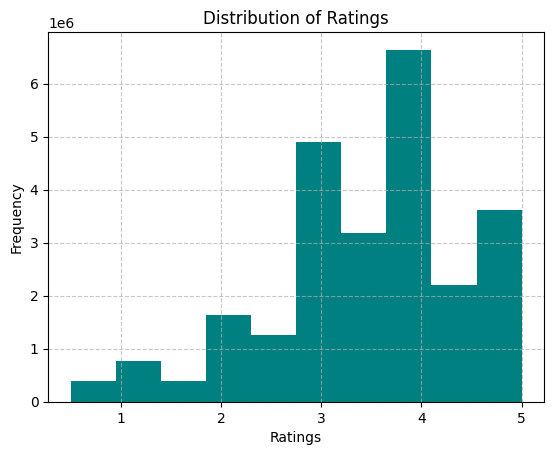

In [ ]:
#@title Plotting the distributions of ratings
plt.hist(ratings, color='teal', alpha=1.0, density=False)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(linestyle='--', alpha=0.7)
plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Practical1/Figures/Rating_distribution_p1.pdf', format='pdf')
plt.show()

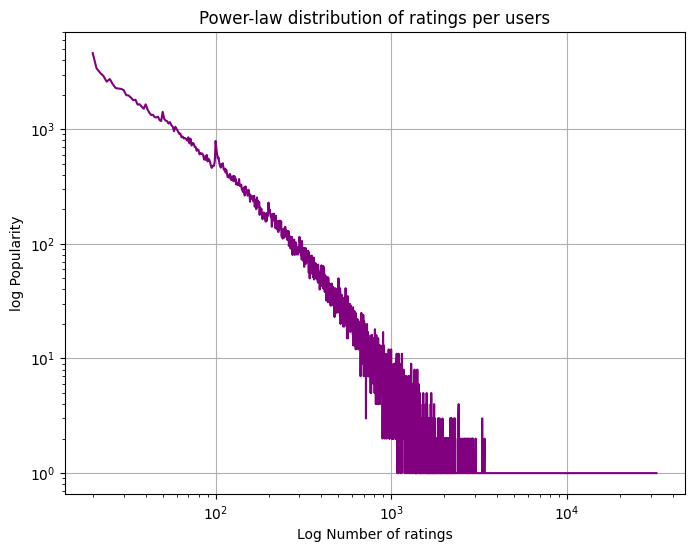

In [ ]:
#Power law 1 :
counter = Counter(number_of_movies_per_user)
values, frequencies = zip(*sorted(counter.items()))
plt.figure(figsize=(8, 6))
plt.plot(values,frequencies, color = 'purple', linestyle = '-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log Number of ratings')
plt.ylabel('log Popularity')
plt.title('Power-law distribution of ratings per users')
plt.grid(True)
plt.show()


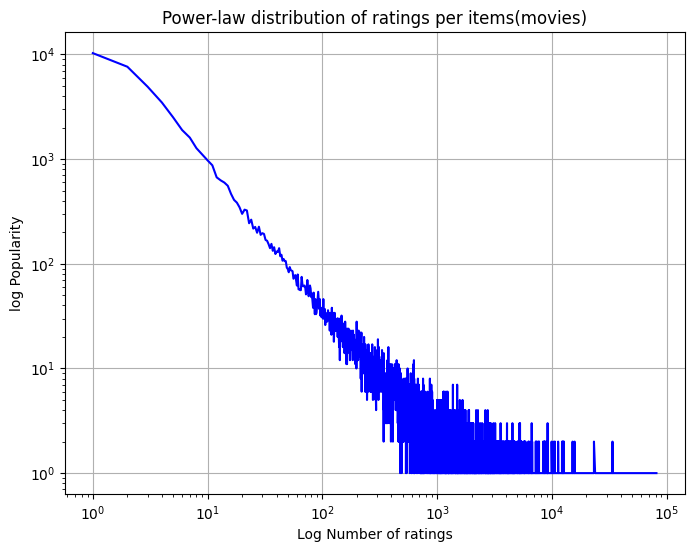

In [ ]:
#Power law 2 :
counter = Counter(number_of_users_per_movie)
values, frequencies = zip(*sorted(counter.items()))
plt.figure(figsize=(8, 6))
plt.plot(values, frequencies, color='blue', linestyle='-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log Number of ratings')
plt.ylabel('log Popularity')
plt.title('Power-law distribution of ratings per items(movies)')
plt.grid(True)
plt.show()


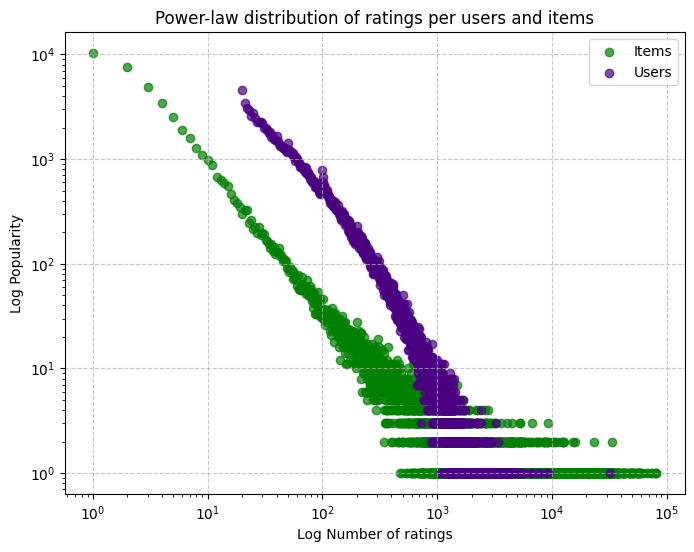

In [ ]:
# Power law 1
counter_users = Counter(number_of_movies_per_user)
values_users, frequencies_users = zip(*sorted(counter_users.items()))

# Power law 2
counter_movies = Counter(number_of_users_per_movie)
values_movies, frequencies_movies = zip(*sorted(counter_movies.items()))

plt.figure(figsize=(8, 6))

# Plot both distributions on one subplot
plt.scatter(values_movies, frequencies_movies, color='green', linestyle='-',alpha=0.7, label='Items')
plt.scatter(values_users, frequencies_users, color='indigo', linestyle='-',alpha=0.7, label='Users')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log Number of ratings')
plt.ylabel('Log Popularity')
plt.title('Power-law distribution of ratings per users and items')
plt.legend()

plt.grid(linestyle='--', alpha=0.7)
plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Practical1/Figures/Power_law_distributions_p1.pdf', format='pdf')

plt.show()

# **2. Practical 2a : ALS with bias only**

In [ ]:
#Shapes
M = len(data_by_user) # Number of users
N = len(data_by_movie) # Number of movies

print(f"Number of users = {M}")
print(f"Number of movies = {N}")

Number of users = 162541
Number of movies = 59047


In [ ]:
# Parameters
lambda_ = 0.1  #
gamma = 0.01   #
max_iterations = 50

# Initialize biases
user_biases = np.zeros((M))
item_biases = np.zeros((N))

In [ ]:
# Helpers
# Function to get items and ratings for a given user
def get_items_and_ratings_for_user(user_index):
    return data_by_user[user_index] # ex output [(m1,r1),(m2,r2)]

# Function to get users and ratings for a given item
def get_users_and_ratings_for_item(item_index):
    return data_by_movie[item_index] #ex output [(u1,r1),(u2,r2)]

def compute_loss(data_by_user, user_bias, movie_bias, lambda_, gamma):
    cost = 0
    for user in range(len(data_by_user)):
        for (movie, rating) in data_by_user[user]:
            predicted_rating = user_bias[user] + movie_bias[movie]
            cost += (rating - predicted_rating) ** 2

    cost *= -0.5 * lambda_
    # user bias
    cost -= 0.5 * gamma * np.sum(user_bias**2 )
    # item_bias
    cost -= 0.5 * gamma  * np.sum(movie_bias**2)
     #log likelihood
    return cost

def rmse(data_by_user, user_biases, item_biases):
    squared_error = 0
    num_ratings = 0
    for m in range(len(data_by_user)):
        for (n, r) in data_by_user[m]:
            prediction = user_biases[m] + item_biases[n]
            squared_error += (r - prediction) ** 2
            num_ratings += 1
    rmse = np.sqrt(squared_error / num_ratings)
    return rmse

In [ ]:
losses = []
rmses = []

for iteration in range(max_iterations):

    #update use biases
    for m in range(M):
        bias = 0
        item_counter = 0
        for (n, r) in get_items_and_ratings_for_user(m):
            bias += lambda_ * (r - item_biases[n])
            item_counter += 1
        bias /= lambda_ * item_counter + gamma
        user_biases[m] = bias

    # Update item biases
    for n in range(N):
        bias = 0
        user_counter = 0
        for (m, r) in get_users_and_ratings_for_item(n):
            bias += lambda_ * (r - user_biases[m])
            user_counter += 1
        bias /= lambda_ * user_counter + gamma
        item_biases[n] = bias

    # Cost and rmse
    loss = compute_loss(data_by_user, user_biases, item_biases, lambda_, gamma)
    rmse_value = rmse(data_by_user, user_biases, item_biases)

    losses.append(loss)
    rmses.append(rmse_value)
    print(f"Iteration {iteration + 1}:\t Loss = {loss:.3f}\t  RMSE = {rmse_value:.3f}")

Iteration 1:	 Loss = -949129.408	  RMSE = 0.866
Iteration 2:	 Loss = -916426.389	  RMSE = 0.851
Iteration 3:	 Loss = -914868.836	  RMSE = 0.850
Iteration 4:	 Loss = -914751.776	  RMSE = 0.850
Iteration 5:	 Loss = -914726.044	  RMSE = 0.850
Iteration 6:	 Loss = -914709.593	  RMSE = 0.850
Iteration 7:	 Loss = -914694.640	  RMSE = 0.850
Iteration 8:	 Loss = -914680.005	  RMSE = 0.850
Iteration 9:	 Loss = -914665.457	  RMSE = 0.850
Iteration 10:	 Loss = -914650.949	  RMSE = 0.850
Iteration 11:	 Loss = -914636.469	  RMSE = 0.850
Iteration 12:	 Loss = -914622.015	  RMSE = 0.850
Iteration 13:	 Loss = -914607.586	  RMSE = 0.850
Iteration 14:	 Loss = -914593.183	  RMSE = 0.850
Iteration 15:	 Loss = -914578.805	  RMSE = 0.850
Iteration 16:	 Loss = -914564.453	  RMSE = 0.850
Iteration 17:	 Loss = -914550.125	  RMSE = 0.850
Iteration 18:	 Loss = -914535.823	  RMSE = 0.850
Iteration 19:	 Loss = -914521.546	  RMSE = 0.850
Iteration 20:	 Loss = -914507.293	  RMSE = 0.850
Iteration 21:	 Loss = -914493

In [ ]:
print(f"Negative loglikelihood converges to {losses[-1]:.3f}.")
print(f"RMSE converges to {rmses[-1]:.3f}.")

Negative loglikelihood converges to -914091.149.
RMSE converges to 0.850.


In [ ]:
def plot_cost_vs_iter(train_costs, title="Evolution of Negative log likelihood over iterations"):

  fig, ax = plt.subplots(figsize=(8, 6))
  iters = np.arange(1,len(train_costs)+1)
  ax.plot(iters, train_costs, color='teal',linewidth=3, label='Negative log likelihood')
  ax.set_xlabel("Number of iterations"); ax.set_xlim(1, iters[-1])
  ax.set_ylabel("Negative log likelihood")
  ax.legend()
  plt.grid(linestyle='--', alpha=0.7)
  plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Practical1/ml-25m/log_bias.pdf', format='pdf')
  ax.set_title(title)
  plt.show()

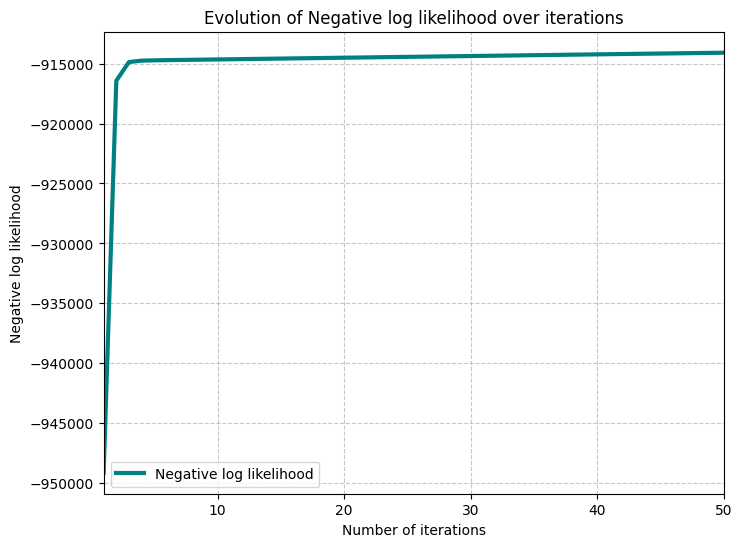

In [ ]:
plot_cost_vs_iter(losses)

In [ ]:

def plot_rmse_vs_iter(train_rmse, title="Evolution of RMSE over iterations"):

  fig, ax = plt.subplots(figsize=(8, 6))
  iters = np.arange(1,len(train_rmse)+1)
  ax.plot(iters, train_rmse, color='teal',linewidth=3, label='RMSE')
  ax.set_xlabel("Number of iterations"); ax.set_xlim(1, iters[-1])
  ax.set_ylabel("RMSE")
  ax.legend()
  plt.grid(linestyle='--', alpha=0.7)
  #plt.savefig('/home/emmanuelnk/Desktop/ML_AT_SCALE/Figures-20240509T064240Z-001/Figures/rmse_bias.pdf', format='pdf')
  plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Practical1/ml-25m/rmse_bias.pdf', format='pdf')
  ax.set_title(title)
  plt.show()

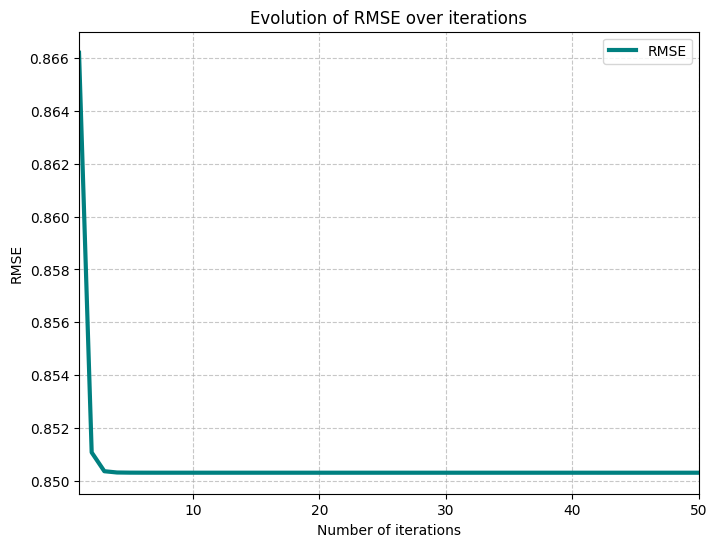

In [ ]:
plot_rmse_vs_iter(rmses)

#**3. Practicals 2 b - 3 : ALS on training and test datasets**

In [ ]:
def create_train_vs_test(data_by_user, data_by_movie,split_percentage):

    # Initialize lists to store training and test data for users and movies
    user_train_data = []
    user_test_data = []

    movie_train_data = []
    movie_test_data = []

    # Iterate through each user's data
    for user_list in data_by_user:

        # Shuffle the user data
        random.shuffle(user_list)

        # Determine the split point based on the split percentage
        decision_boundary_u = int(len(user_list) * split_percentage)

        # Split the data into training and test sets
        train_data_u = user_list[:decision_boundary_u]
        test_data_u = user_list[decision_boundary_u:]

        # Append the training and test data to the respective data
        user_train_data.append(train_data_u)
        user_test_data.append(test_data_u)

    # Iterate through each movie's data
    for movie_list in data_by_movie:

        # Shuffle the movie data
        random.shuffle(movie_list)

        # Determine the split point based on the split percentage
        decision_boundary_m = int(len(movie_list) * split_percentage)

        # Split the data into training and test sets
        train_data_m = movie_list[:decision_boundary_m]
        test_data_m = movie_list[decision_boundary_m:]

        # Append the training and test data
        movie_train_data.append(train_data_m)
        movie_test_data.append(test_data_m)

    # Return the training and test matrices for users and movies
    return user_train_data, user_test_data, movie_train_data, movie_test_data


In [ ]:
split_percentage = 0.9
# Initialize data structures
data_by_user_train, data_by_user_test, data_by_movie_train, data_by_movie_test = create_train_vs_test(data_by_user, data_by_movie,split_percentage)

In [ ]:
# Train and test should have the same lenth
print(f"Number of users for : training = {len(data_by_user_train)}, and for test = {len(data_by_user_test)}.")
print(f"Number of movies for : training = {len(data_by_movie_train)}, and for test = {len(data_by_movie_test)}.")


Number of users for : training = 162541, and for test = 162541.
Number of movies for : training = 59047, and for test = 59047.


In [ ]:
# 2.1. Initialization

# Hyperparameters vs also for predictions
max_iterations = 50 # also 15
lambda_ = 0.01# also 0.01
gamma = 0.5 # also 0.01
tau = 0.01 #also 0.5
K = 4 # also 5

# Initialize user and item biases
M = len(data_by_user_train)  # Number of users
N = len(data_by_movie_train)  # Number of items
user_biases = np.zeros((M))
item_biases = np.zeros((N))

# Initialization of matrices U and V with random values for both training and test sets
U = np.random.normal(loc=0.0, scale=1.0 / np.sqrt(K), size=(M, K))
V = np.random.normal(loc=0.0, scale=1.0 / np.sqrt(K), size=(N, K))

In [ ]:
# 2.2. Helpers : vectorized Functions for updating

# UPDATING PARAMETERS
from scipy.sparse import csr_matrix
def update_params(data_by_user, data_by_movie, user_biases, item_biases, U, V, lambda_, gamma, tau, K):
    # Convert data to CSR format for fast row slicing
    data_by_user_csr = [csr_matrix((np.array([r for _, r in user_ratings]),
                                    (np.zeros(len(user_ratings)), np.array([n for n, _ in user_ratings]))),
                                    shape=(1, len(data_by_movie)))
                        for user_ratings in data_by_user]

    data_by_movie_csr = [csr_matrix((np.array([r for _, r in movie_ratings]),
                                     (np.zeros(len(movie_ratings)), np.array([m for m, _ in movie_ratings]))),
                                     shape=(1, len(data_by_user)))
                         for movie_ratings in data_by_movie]

    # Update user biases
    for m in range(len(data_by_user)):
        if data_by_user[m]:
            item_indices = np.array([n for n, _ in data_by_user[m]])
            ratings = np.array([r for _, r in data_by_user[m]])
            predictions = U[m].dot(V[item_indices].T) + item_biases[item_indices]
            user_biases[m] = np.sum(lambda_ * (ratings - predictions)) / (lambda_ * len(data_by_user[m]) + gamma)

    # Update item biases
    for n in range(len(data_by_movie)):
        if data_by_movie[n]:
            user_indices = np.array([m for m, _ in data_by_movie[n]])
            ratings = np.array([r for _, r in data_by_movie[n]])
            predictions = V[n].dot(U[user_indices].T) + user_biases[user_indices]
            item_biases[n] = np.sum(lambda_ * (ratings - predictions)) / (lambda_ * len(data_by_movie[n]) + gamma)

    # Update user latent factors
    for m in range(len(data_by_user)):
        if data_by_user[m]:
            item_indices = np.array([n for n, _ in data_by_user[m]])
            ratings = np.array([r for _, r in data_by_user[m]])
            A = V[item_indices].T.dot(V[item_indices]) + tau * np.eye(K)
            b = (ratings - user_biases[m] - item_biases[item_indices]).dot(V[item_indices])
            U[m] = np.linalg.solve(lambda_ * A, lambda_ * b)

    # Update item latent factors
    for n in range(len(data_by_movie)):
        if data_by_movie[n]:
            user_indices = np.array([m for m, _ in data_by_movie[n]])
            ratings = np.array([r for _, r in data_by_movie[n]])
            A = U[user_indices].T.dot(U[user_indices]) + tau * np.eye(K)
            b = (ratings - user_biases[user_indices] - item_biases[n]).dot(U[user_indices])
            V[n] = np.linalg.solve(lambda_ * A, lambda_ * b)

# Negative log likelihood (NLL)
def negative_log_likelihood(data_by_user, user_biases, item_biases, U, V, lambda_, gamma, tau):
    nll = 0
    for m in range(len(data_by_user)):
        for n, r in data_by_user[m]:
            prediction = np.dot(U[m], V[n]) + user_biases[m] + item_biases[n]
            nll += (r - prediction) ** 2

    nll *= -0.5 * lambda_
    sum_user = -0.5 * tau * np.sum(U * U)
    sum_movie = -0.5 * tau * np.sum(V * V)
    sum_bias_user = -0.5 * gamma * np.sum(user_biases ** 2)
    sum_bias_movie = -0.5 * gamma * np.sum(item_biases ** 2)

    cost = nll + sum_user + sum_movie + sum_bias_user + sum_bias_movie
    return cost

# Root Mean Squared Error (RMSE)
def rmse(data_by_user, user_biases, item_biases, U, V):
    squared_error = 0
    num_ratings = 0
    for m in range(len(data_by_user)):
        for n, r in data_by_user[m]:
            prediction = np.dot(U[m], V[n]) + user_biases[m] + item_biases[n]
            squared_error += (r - prediction) ** 2
            num_ratings += 1
    rmse_value = np.sqrt(squared_error / num_ratings)
    return rmse_value

In [ ]:
# 2.3. VECTORIZED TRAINING IN ACTION
# Training function
def als(data_by_user_train, data_by_movie_train, data_by_user_test, data_by_movie_test, user_biases, item_biases, U, V, K, lambda_, gamma, tau, max_iterations):
    losses_train = []
    rmses_train = []
    losses_test = []
    rmses_test = []

    for j in range(max_iterations):
        # Update biases and latent vectors
        update_params(data_by_user_train, data_by_movie_train, user_biases, item_biases, U, V, lambda_, gamma, tau, K)

        # Loss and RMSE train
        loss_train = negative_log_likelihood(data_by_user_train, user_biases, item_biases, U, V, lambda_, gamma, tau)
        losses_train.append(loss_train)
        rmse_train = rmse(data_by_user_train, user_biases, item_biases, U, V)
        rmses_train.append(rmse_train)

        # Loss and RMSE test
        loss_test = negative_log_likelihood(data_by_user_test, user_biases, item_biases, U, V, lambda_, gamma, tau)
        losses_test.append(loss_test)
        rmse_test = rmse(data_by_user_test, user_biases, item_biases, U, V)
        rmses_test.append(rmse_test)

        # Print results
        print(f'\tIteration:{j + 1}\t Train_loss:{losses_train[j]:.2f}\t Test_loss:{losses_test[j]:.2f}\t Train_RMSE:{rmses_train[j]:.2f}\t Test_RMSE:{rmses_test[j]:.2f}')

    return losses_train, rmses_train, losses_test, rmses_test, U, V


In [ ]:
# So, let's train :
losses_train, rmses_train, losses_test, rmses_test, U, V = als(data_by_user_train, data_by_movie_train, data_by_user_test, data_by_movie_test, user_biases, item_biases, U, V, K, lambda_, gamma, tau,max_iterations)

	Iteration:1	 Train_loss:-309376.82	 Test_loss:-224154.71	 Train_RMSE:1.00	 Test_RMSE:1.06
	Iteration:2	 Train_loss:-206049.39	 Test_loss:-137744.72	 Train_RMSE:0.90	 Test_RMSE:0.93
	Iteration:3	 Train_loss:-146863.58	 Test_loss:-88972.04	 Train_RMSE:0.82	 Test_RMSE:0.86
	Iteration:4	 Train_loss:-119199.78	 Test_loss:-64424.80	 Train_RMSE:0.80	 Test_RMSE:0.84
	Iteration:5	 Train_loss:-105681.17	 Test_loss:-52006.44	 Train_RMSE:0.79	 Test_RMSE:0.83
	Iteration:6	 Train_loss:-97963.42	 Test_loss:-44809.12	 Train_RMSE:0.79	 Test_RMSE:0.83
	Iteration:7	 Train_loss:-93050.33	 Test_loss:-40211.85	 Train_RMSE:0.79	 Test_RMSE:0.82
	Iteration:8	 Train_loss:-89642.76	 Test_loss:-37032.14	 Train_RMSE:0.79	 Test_RMSE:0.82
	Iteration:9	 Train_loss:-87135.41	 Test_loss:-34706.24	 Train_RMSE:0.79	 Test_RMSE:0.82
	Iteration:10	 Train_loss:-85218.14	 Test_loss:-32933.40	 Train_RMSE:0.78	 Test_RMSE:0.82
	Iteration:11	 Train_loss:-83706.88	 Test_loss:-31536.54	 Train_RMSE:0.78	 Test_RMSE:0.82
	Iteration:1

In [ ]:
 def plot_cost_vs_iter(train_costs,test_costs, title="Evolution of Negative log likelihood over iterations"):

  fig, ax = plt.subplots(figsize=(8, 6))
  iters = np.arange(1,len(train_costs)+1)
  ax.plot(iters, train_costs, color='teal',linewidth=2, label='Loss_Train')
  ax.plot(iters, test_costs, color='purple',linewidth=2, label='Loss_Test')
  ax.set_xlabel("Iteration"); ax.set_xlim(1, iters[-1])
  ax.set_ylabel("Negative log likelihood")
  ax.legend()
  plt.grid(linestyle='--', alpha=0.7)
  plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Rapport/Results/FINAL_NLL.pdf', format='pdf')
  ax.set_title(title)
  plt.show()

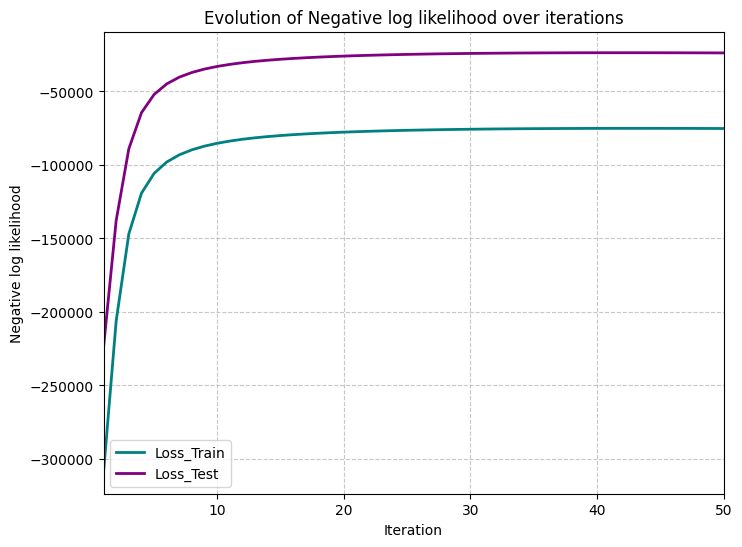

In [ ]:
plot_cost_vs_iter(losses_train,losses_test)

In [ ]:
def plot_rmse_vs_iter(train_rmse,test_rmse, title="Evolution of RMSE over iterations"):

  fig, ax = plt.subplots(figsize=(8, 6))
  iters = np.arange(1,len(train_rmse)+1)
  ax.plot(iters, train_rmse, color='teal',linewidth=2, label='RMSE_Train')
  ax.plot(iters, test_rmse, color='purple',linewidth=2, label='RMSE_Test')
  ax.set_xlabel("Iteration"); ax.set_xlim(1, iters[-1])
  ax.set_ylabel("RMSE")
  ax.legend()
  plt.grid(linestyle='--', alpha=0.7)
  #plt.savefig('/content/drive/MyDrive/MACHINE_LEARNING/AML_AT_SCALE/Rapport/Results/FINAL_RMSE.pdf', format='pdf')
  ax.set_title(title)
  plt.show()

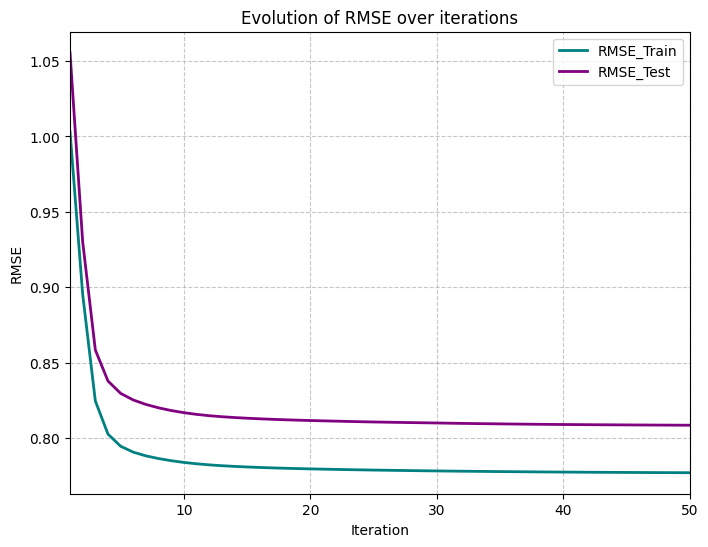

In [ ]:
plot_rmse_vs_iter(rmses_train,rmses_test)

In [ ]:
#Convergence
print(f" Overall  iterations, the Negative Log likelihood converges to {losses_train[-1]:.2f} on the training and {losses_test[-1]:.2f} on the test datasets." )
print(f" Overall  iterations, the RMSE converges to {rmses_train[-1]:.2f} on the training and {rmses_test[-1]:.2f} on the test datasets." )

 Overall  iterations, the Negative Log likelihood converges to -75188.33 on the training and -23772.66 on the test datasets.
 Overall  iterations, the RMSE converges to 0.78 on the training and 0.81 on the test datasets.


* Dummy user

In [ ]:
def find_related_movies(search_string, df_movies):
    # Filter movies dataframe based on search string in titles
    related_movies = df_movies[df_movies['title'].str.contains(search_string, case=False)]

    # Select only movieId, title, and genres columns
    related_movies = related_movies[['movieId', 'title', 'genres']]

    return related_movies

In [ ]:
search_string = "lord of the ring"
related_movies_df = find_related_movies(search_string, df_movies)
related_movies_df

,movieId,title,genres
2026,2116,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy
4887,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
5840,5952,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy
7028,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy


In [ ]:
new_user = [(movie_to_index[4993],5)]

In [ ]:
def embed_user(data_by_user, item_biases, V, lambda_, gamma, tau, K,n_epoch=20):
    n_user = np.random.normal(0,1/np.sqrt(K),size=(1,K))

    user_b = 0
    for i in tqdm(range(n_epoch)):
        # Update user biases

        item_indices = np.array([n for n, _ in data_by_user])
        ratings = np.array([r for _, r in data_by_user])
        predictions = n_user.dot(V[item_indices].T) + item_biases[item_indices]
        user_b = np.sum(lambda_ * (ratings - predictions)) / (lambda_ * len(data_by_user) + gamma)

        # Update user latent factors

        item_indices = np.array([n for n, _ in data_by_user])
        ratings = np.array([r for _, r in data_by_user])
        A = V[item_indices].T.dot(V[item_indices]) + tau * np.eye(K)
        b = (ratings - user_b - item_biases[item_indices]).dot(V[item_indices])
        n_user = np.linalg.solve(lambda_ * A, lambda_ * b)

    return n_user

In [ ]:
user_embedding = embed_user(new_user,item_biases,V,lambda_,gamma,tau,K)

100%|████████████████████████████████████████| 20/20 [00:00<00:00, 11663.80it/s]


In [ ]:
score = user_embedding @ V.T + 0.05 * item_biases

In [ ]:
ranks = np.argsort(score)[::-1][:20]

In [ ]:
index_to_movieId = {idx:mId for mId,idx in movie_to_index.items()}

In [ ]:
for rank in ranks:
    movie = index_to_movieId[rank]
    title = df_movies[df_movies['movieId'] == movie][['title','genres']].values[0]
    print(title[0],title[1])

Live! (2007) Comedy|Drama
Who You Think I Am (2019) Drama
You Are Not Alone (2016) Horror|Thriller
Cat City (1986) Animation|Children
Lewis Black: In God We Rust (2012) Comedy
Countdown (2004) Action|Adventure|Crime
Malice in Wonderland (2009) Drama|Fantasy|Romance
Naruto Shippuden the Movie: Road to Ninja (2012) Action|Adventure|Animation|Fantasy
Tormented (2009) Comedy|Horror
Don't Hug Me I'm Scared 6 (2016) Animation|Horror
Lord of the Rings: The Return of the King, The (2003) Action|Adventure|Drama|Fantasy
Cream (2017) Animation|Comedy|Horror|Sci-Fi
Lord of the Rings: The Fellowship of the Ring, The (2001) Adventure|Fantasy
The Zen Diaries of Garry Shandling: Parts 1 & 2 Comedy|Documentary
Lord of the Rings: The Two Towers, The (2002) Adventure|Fantasy
Avengers: Infinity War - Part I (2018) Action|Adventure|Sci-Fi
Yolki 2 (2011) Comedy
Avengers: Infinity War - Part II (2019) Action|Adventure|Sci-Fi
Üvegtigris (2001) Comedy
Architecture 101 (2012) Comedy|Romance


In [ ]:
#Polarizing
polarity = np.linalg.norm(V, axis=0)

# Get indices of the 20 most polarized movies
most_polarizing_indices = np.argsort(polarity)[-5:][::-1]

# Print the top 20 most polarizing movies
print("The most polarizing movies are:")
for i in most_polarizing_indices:
    movie = index_to_movieId[i]
    title = df_movies[df_movies['movieId'] == movie][['title', 'genres']].values[0]
    print(f"{title[0]} ({title[1]})")

The most polarizing movies are:
Three Colors: Blue (Trois couleurs: Bleu) (1993) (Drama)
Pulp Fiction (1994) (Comedy|Crime|Drama|Thriller)
Underground (1995) (Comedy|Drama|War)
Singin' in the Rain (1952) (Comedy|Musical|Romance)
Three Colors: Red (Trois couleurs: Rouge) (1994) (Drama)


In [ ]:
# Print the 20 least polarizing movies
least_polarizing_indices = np.argsort(polarity)[:5]
print("\n The least polarizing movies are:")
for i in least_polarizing_indices:
    movie = index_to_movieId[i]
    title = df_movies[df_movies['movieId'] == movie][['title', 'genres']].values[0]
    print(f"{title[0]} ({title[1]})")


The 20 least polarizing movies are:
Three Colors: Red (Trois couleurs: Rouge) (1994) (Drama)
Singin' in the Rain (1952) (Comedy|Musical|Romance)
Underground (1995) (Comedy|Drama|War)
Pulp Fiction (1994) (Comedy|Crime|Drama|Thriller)
Three Colors: Blue (Trois couleurs: Bleu) (1993) (Drama)
